
📌 First 5 Rows of the Dataset:
╒════╤═════════════════╤════════════════════════╤════════════════╤══════════════════╤═════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════╤══════════════════════════════════════════════════════════════╤═════════════╤════════════╤══════════════════════════════════╤════════════════════════╤══════════════════╤═════════════════════╤═══════════════════════╤═════════════════════╤════════════════════════╤═══════════════╤════════════════════╤════════════════╤═══════════════╤═════════╕
│    │   Restaurant ID │ Restaurant Name        │   Country Code │ City             │ Address                                                                 │ Locality                                   │ Locality Verbose                                             │   Longitude │   Latitude │ Cuisines                         │   Average Cost for two │ Currency         │ Has Table booking   │ Has Online delivery   │ I

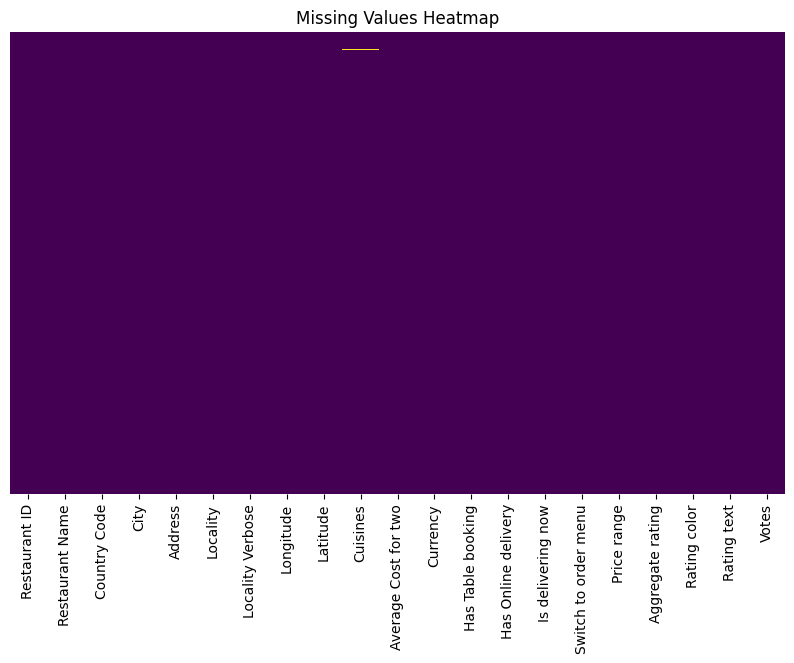

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load dataset
data = pd.read_csv("/content/Dataset.csv")  # Ensure correct file path
df = pd.DataFrame(data)

# Display dataset structure
print("\n📌 First 5 Rows of the Dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

# Show dataset information
print("\n📝 Dataset Information:")
print(df.info())

# Check for missing values
print("\n🔍 Missing Values in Each Column:")
print(tabulate(df.isnull().sum().reset_index(), headers=["Column", "Missing Values"], tablefmt="fancy_grid"))

# Display summary statistics
print("\n📈 Summary Statistics:")
print(tabulate(df.describe(), headers='keys', tablefmt='fancy_grid'))

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
import pandas as pd
from tabulate import tabulate

# Drop rows where 'Price range', 'Has Table booking', or 'Has Online delivery' have missing values
data = data.dropna(subset=['Price range', 'Has Table booking', 'Has Online delivery'])

# Display first 10 rows in structured format
print("\n📌 First 10 Rows After Dropping NaN:")
print(tabulate(data.head(10), headers='keys', tablefmt='fancy_grid'))



📌 First 10 Rows After Dropping NaN:
╒════╤═════════════════╤══════════════════════════════════════════╤════════════════╤══════════════════╤═════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════╤═════════════╤════════════╤════════════════════════════════════╤════════════════════════╤══════════════════╤═════════════════════╤═══════════════════════╤═════════════════════╤════════════════════════╤═══════════════╤════════════════════╤════════════════╤═══════════════╤═════════╕
│    │   Restaurant ID │ Restaurant Name                          │   Country Code │ City             │ Address                                                                             │ Locality                                        │ Locality Verbose                                             │   Longitude │   Latitude │ Cuisines                           │   Average Co

In [8]:
data['Has Table booking'] = data['Has Table booking'].map({'Yes': True, 'No': False})
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': True, 'No': False})

Text(0.5, 1.0, 'Relationship between Price Range and Availability of Table Booking & Online Delivery')

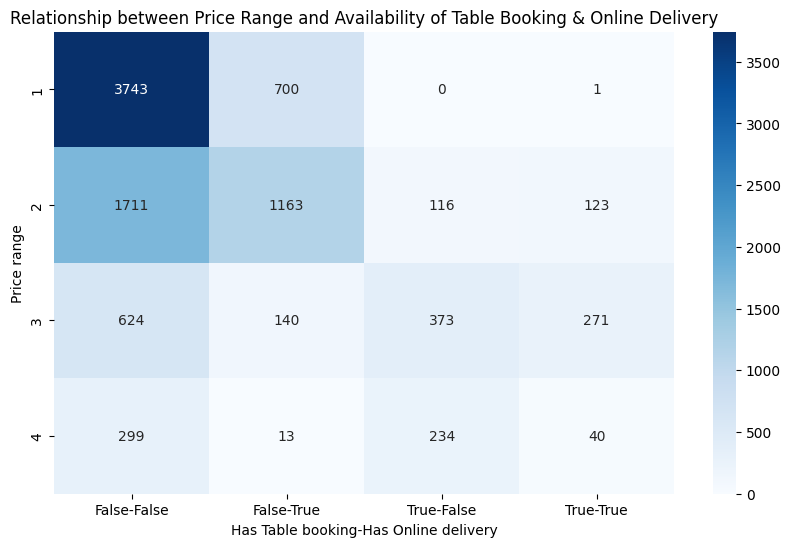

In [9]:
plt.figure(figsize=(10, 6))
heatmap = pd.crosstab(data['Price range'], [data['Has Table booking'], data['Has Online delivery']])
sns.heatmap(heatmap, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Relationship between Price Range and Availability of Table Booking & Online Delivery')

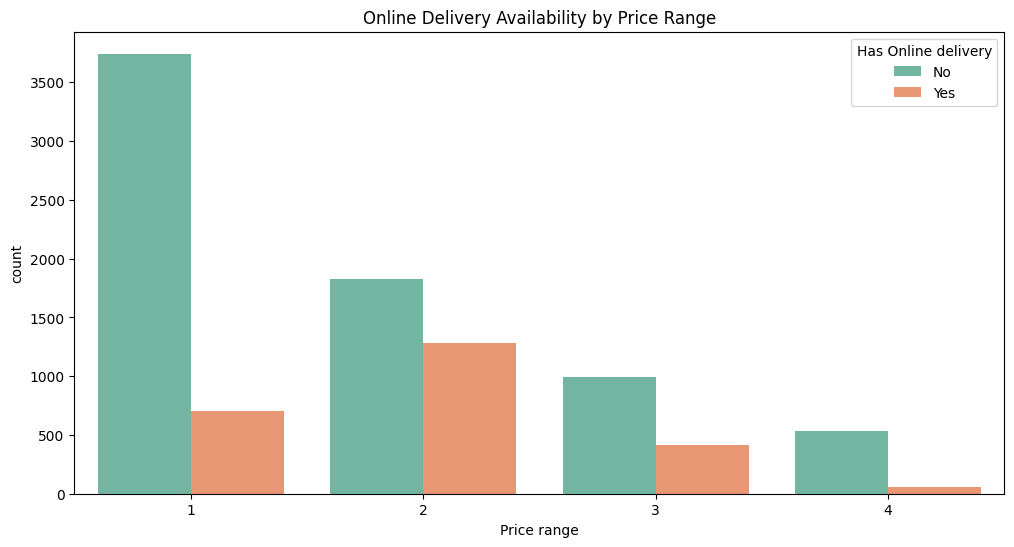

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=df, palette='Set2')
plt.title('Online Delivery Availability by Price Range')
plt.show()

<ipython-input-13-643fc383086b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price range', y='Votes', hue='Has Table booking', data=df, ci=None, palette='coolwarm')


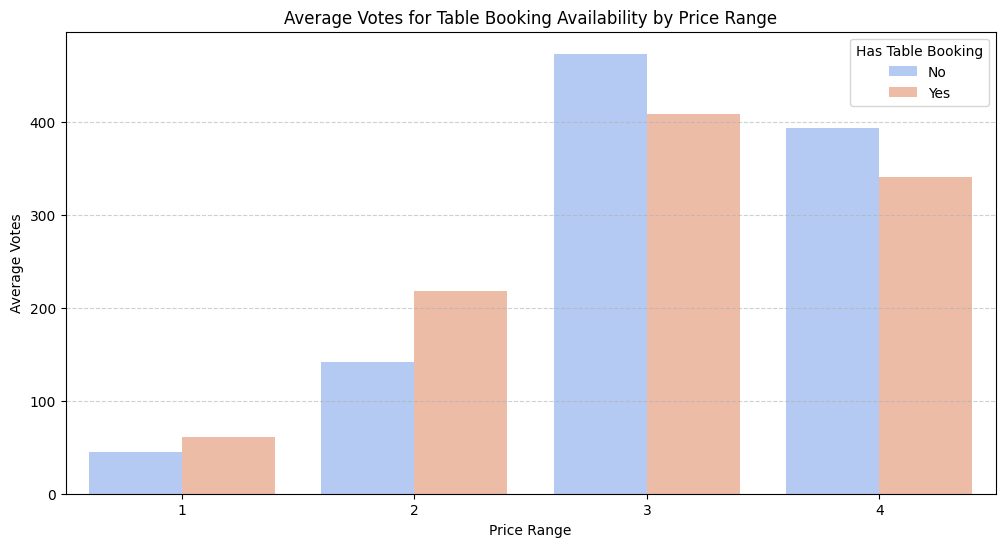

In [13]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Price range', y='Votes', hue='Has Table booking', data=df, ci=None, palette='coolwarm')

plt.title('Average Votes for Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Votes')
plt.xticks(rotation=0)
plt.legend(title='Has Table Booking')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

